In [823]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

In [824]:
# for the sake of reproducibility 

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# RNN recap

<img src="./pics/rnn.png" width="90%">

Simplest RNN consisting of 1 layer receives $x_{(t)}$ and could be written as:

$$y_{(t)} = \phi (x_{(t)}^T \cdot w_x + y_{(t-1)}^T \cdot w_y + b)$$

where 
* $x(t)$ -- input vector at time step _t_ 
* $y(t)$ -- output vector at time step _t_
* $w_x$ -- weights vector for input 
* $w_y$ -- weights vector for output
* $y(t-1)$ -- output vector at previous time step; for 0th step it's zero vector
* $b$ -- bias
* $\phi$ -- some activation function, i.e. ReLU


Also we should mention **hidden_state** ( $h(t)$ ) -- it's recurrent cell memory.

In general case $h_{(t)} = f(h_{(t-1)}, x_{(t)})$, but also $y{(t)} = f(h{(t-1)}, x{(t)})$. So in this case $h(t) == y(t)$, but in practice more complex architectures are used, where **hidden_state** is not equal to the RNN output.

------

## Lets write simple RNN
To write RNN we need to make few improvements to formula.

Lets say that we have not only one vector $x_{(t)}$ as input, but a few vectors in mini-batch $X_{(t)}$ of size $m$ . So all consequent computaions will be in matrix form.

$$ Y_{(t)} = \phi(X_{(t)} \cdot W_x + Y_{(t-1)} \cdot W_y + b) = \phi([X_{(t)} Y_{(t-1)}] \cdot W + b) $$
where
$$ W = [W_x W_y]^T $$

*It's matrix concatination in square brackets

Dimentions:
* $Y_{(t)}$ -- matrix [$m$ x n_neurons]
* $X_{(t)}$ -- matrix [$m$ x n_features]
* $b$ -- vector of size `n_neurons`
* $W_x$ -- input weights of size [n_features x n_neurons]
* $W_y$ -- output weights of size [n_neurons x n_neurons]

In [825]:
reset_graph()

n_features = 3
n_neurons = 5

# two time steps
X0 = tf.placeholder(tf.float32, [None, n_features])
X1 = tf.placeholder(tf.float32, [None, n_features])

Wx = tf.Variable(tf.random_normal(shape=[n_features, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

# tanh as phi
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [826]:
# mini-batches of size 4
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])  # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])  # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [827]:
Y0_val

array([[-0.0664006 ,  0.96257669,  0.68105793,  0.70918542, -0.89821601],
       [ 0.9977755 , -0.71978903, -0.99657607,  0.96739239, -0.99989718],
       [ 0.99999774, -0.99898803, -0.99999893,  0.99677622, -0.99999988],
       [ 1.        , -1.        , -1.        , -0.99818915,  0.99950868]], dtype=float32)

In [828]:
Y1_val

array([[ 1.        , -1.        , -1.        ,  0.40200251, -0.99999982],
       [-0.12210421,  0.62805271,  0.96718431, -0.99371219, -0.25839362],
       [ 0.99999827, -0.9999994 , -0.9999975 , -0.85943311, -0.99998808],
       [ 0.99928284, -0.99999815, -0.99990582,  0.98579627, -0.92205757]], dtype=float32)

## Task

Make the same computation using only one matrix multiplication.

In [829]:
reset_graph()
# <insert your code here>
X0 = tf.placeholder(tf.float32, [None, n_features])
X1 = tf.placeholder(tf.float32, [None, n_features])

Wx = tf.Variable(tf.random_normal(shape=[n_features, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(tf.concat([Y0, X1], 1), tf.concat([Wy, Wx], 0))+ b)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    Y0_val_1, Y1_val_1 = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})

In [830]:
Y0_val_1

array([[-0.0664006 ,  0.96257669,  0.68105793,  0.70918542, -0.89821601],
       [ 0.9977755 , -0.71978903, -0.99657607,  0.96739239, -0.99989718],
       [ 0.99999774, -0.99898803, -0.99999893,  0.99677622, -0.99999988],
       [ 1.        , -1.        , -1.        , -0.99818915,  0.99950868]], dtype=float32)

In [831]:
Y1_val_1

array([[ 1.        , -1.        , -1.        ,  0.40200251, -0.99999982],
       [-0.12210421,  0.62805271,  0.96718431, -0.99371219, -0.2583937 ],
       [ 0.99999827, -0.9999994 , -0.9999975 , -0.85943305, -0.99998802],
       [ 0.99928284, -0.99999815, -0.99990582,  0.98579627, -0.92205751]], dtype=float32)

# Dynamic_rnn

In TensorFlow there is a function `tf.contrib.rnn.static_rnn` which create for each time step (unrolling) specific cell of desired type. Our implementation follows `tf.contrib.rnn.BasicRNNCell`. This implementation has such a drawback - we could need a lot of memory for long sequences. And because we want to work with such sequences we need to allocate a lot of memory at once. But in TF there is another option -- `dynamic_rnn`, where memory is allocated dynamically for each provided sequence, acording to its lenght.

Lets rewrite the code with `dynamic_rnn`.

In [832]:
n_steps = 2
n_features = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_features])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

In [833]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

In [834]:
init = tf.global_variables_initializer()
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

# sequence lengths
seq_length_batch = np.array([2, 1, 2, 2])
print('X_batch.shape',X_batch.shape)

X_batch.shape (4, 2, 3)


In [835]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})

In [836]:
print(outputs_val.shape)
print(states_val.shape)

(4, 2, 5)
(4, 5)


In [837]:
# for the second sample there are zeros in output 
print(outputs_val)

[[[ 0.73155707  0.34835717  0.50581998 -0.22882833 -0.44022718]
  [-0.61832315  0.99999994  0.86584806  0.97933769  0.9902246 ]]

 [[ 0.8438704   0.99697548  0.84789461  0.4303219   0.09275495]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.91159219  0.99999052  0.95954454  0.81892216  0.57740247]
  [-0.77545464  0.99987745  0.97847283  0.73172009  0.888776  ]]

 [[-0.99952269  0.99977839  0.59744656  0.99309695  0.99847412]
  [-0.62120003  0.54000849  0.96938425  0.19893228  0.1944804 ]]]


In [838]:
# but in state there are not
print(states_val)

[[-0.61832315  0.99999994  0.86584806  0.97933769  0.9902246 ]
 [ 0.8438704   0.99697548  0.84789461  0.4303219   0.09275495]
 [-0.77545464  0.99987745  0.97847283  0.73172009  0.888776  ]
 [-0.62120003  0.54000849  0.96938425  0.19893228  0.1944804 ]]


# Name generation

Lets try to do something useful with our RNNs.

_Teaser:_

* It is hard to choose a name for a variable. But its much harder to choose a name for a person.
  So lets make neural net do it instead!
* Dataset consists of 8 thousand people names from different cultures all around the world.
* Our toy task be to train a model to generate a name.

In [839]:
start_token = " "

with open("names") as f:
    names = f.readlines()
    names = [start_token + name.lower() for name in names]
    print(names)

[' abagael\n', ' abagail\n', ' abbe\n', ' abbey\n', ' abbi\n', ' abbie\n', ' abby\n', ' abigael\n', ' abigail\n', ' abigale\n', ' abra\n', ' acacia\n', ' ada\n', ' adah\n', ' adaline\n', ' adara\n', ' addie\n', ' addis\n', ' adel\n', ' adela\n', ' adelaide\n', ' adele\n', ' adelice\n', ' adelina\n', ' adelind\n', ' adeline\n', ' adella\n', ' adelle\n', ' adena\n', ' adey\n', ' adi\n', ' adiana\n', ' adina\n', ' adora\n', ' adore\n', ' adoree\n', ' adorne\n', ' adrea\n', ' adria\n', ' adriaens\n', ' adrian\n', ' adriana\n', ' adriane\n', ' adrianna\n', ' adrianne\n', ' adrien\n', ' adriena\n', ' adrienne\n', ' aeriel\n', ' aeriela\n', ' aeriell\n', ' ag\n', ' agace\n', ' agata\n', ' agatha\n', ' agathe\n', ' aggi\n', ' aggie\n', ' aggy\n', ' agna\n', ' agnella\n', ' agnes\n', ' agnese\n', ' agnesse\n', ' agneta\n', ' agnola\n', ' agretha\n', ' aida\n', ' aidan\n', ' aigneis\n', ' aila\n', ' aile\n', ' ailee\n', ' aileen\n', ' ailene\n', ' ailey\n', ' aili\n', ' ailina\n', ' ailyn\n', ' 

In [840]:
print('n samples = ', len(names))
for x in names[::1000]:
    print(x.strip().capitalize())

n samples =  7944
Abagael
Claresta
Glory
Liliane
Prissie
Geeta
Giovanne
Piggy


# Text processing

Lets take all the latters disregarding a case + symbol ')' for the end of a name

In [841]:
token_set = set()
for name in names:
    for letter in name:
        token_set.add(letter)


token_set.add(')')
tokens = list(token_set)
tokens.sort()
print(token_set)
print(tokens)
print('n_tokens = ', len(tokens))

{'-', 'w', 't', 'o', "'", 'h', 'd', 'e', 'g', 'r', 'n', 'j', '\n', 'l', ' ', 'y', 'x', ')', 'b', 'k', 'q', 'u', 'f', 's', 'm', 'z', 'p', 'i', 'v', 'c', 'a'}
['\n', ' ', "'", ')', '-', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
n_tokens =  31


In [842]:
token_to_id = {t: i for i, t in enumerate(tokens)}
print(token_to_id)
id_to_token = {i: t for i, t in enumerate(tokens)}
print(id_to_token)

{'\n': 0, ' ': 1, "'": 2, ')': 3, '-': 4, 'a': 5, 'b': 6, 'c': 7, 'd': 8, 'e': 9, 'f': 10, 'g': 11, 'h': 12, 'i': 13, 'j': 14, 'k': 15, 'l': 16, 'm': 17, 'n': 18, 'o': 19, 'p': 20, 'q': 21, 'r': 22, 's': 23, 't': 24, 'u': 25, 'v': 26, 'w': 27, 'x': 28, 'y': 29, 'z': 30}
{0: '\n', 1: ' ', 2: "'", 3: ')', 4: '-', 5: 'a', 6: 'b', 7: 'c', 8: 'd', 9: 'e', 10: 'f', 11: 'g', 12: 'h', 13: 'i', 14: 'j', 15: 'k', 16: 'l', 17: 'm', 18: 'n', 19: 'o', 20: 'p', 21: 'q', 22: 'r', 23: 's', 24: 't', 25: 'u', 26: 'v', 27: 'w', 28: 'x', 29: 'y', 30: 'z'}


## Name length distribution

16


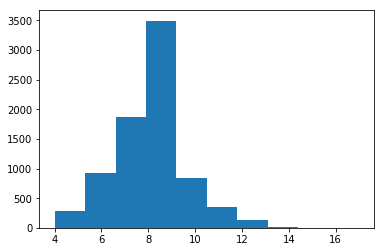

In [843]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(list(map(len, names)))

# max length of a name in this dataset
MAX_LEN = min([60, max(list(map(len, names)))])-1

print(MAX_LEN)

### Convert symbols to their ids

In [844]:
names_ix = list(map(lambda name: list(map(token_to_id.get, name + ')')), names))
print(names_ix)

for i in range(len(names_ix)):
    names_ix[i] = names_ix[i][:MAX_LEN+1] #crop too long
    
    if len(names_ix[i]) < MAX_LEN+1:
        names_ix[i] += [token_to_id[" "]]*(MAX_LEN+1 - len(names_ix[i])) #pad too short
        
assert len(set(map(len, names_ix))) == 1

names_ix = np.array(names_ix)

[[1, 5, 6, 5, 11, 5, 9, 16, 0, 3], [1, 5, 6, 5, 11, 5, 13, 16, 0, 3], [1, 5, 6, 6, 9, 0, 3], [1, 5, 6, 6, 9, 29, 0, 3], [1, 5, 6, 6, 13, 0, 3], [1, 5, 6, 6, 13, 9, 0, 3], [1, 5, 6, 6, 29, 0, 3], [1, 5, 6, 13, 11, 5, 9, 16, 0, 3], [1, 5, 6, 13, 11, 5, 13, 16, 0, 3], [1, 5, 6, 13, 11, 5, 16, 9, 0, 3], [1, 5, 6, 22, 5, 0, 3], [1, 5, 7, 5, 7, 13, 5, 0, 3], [1, 5, 8, 5, 0, 3], [1, 5, 8, 5, 12, 0, 3], [1, 5, 8, 5, 16, 13, 18, 9, 0, 3], [1, 5, 8, 5, 22, 5, 0, 3], [1, 5, 8, 8, 13, 9, 0, 3], [1, 5, 8, 8, 13, 23, 0, 3], [1, 5, 8, 9, 16, 0, 3], [1, 5, 8, 9, 16, 5, 0, 3], [1, 5, 8, 9, 16, 5, 13, 8, 9, 0, 3], [1, 5, 8, 9, 16, 9, 0, 3], [1, 5, 8, 9, 16, 13, 7, 9, 0, 3], [1, 5, 8, 9, 16, 13, 18, 5, 0, 3], [1, 5, 8, 9, 16, 13, 18, 8, 0, 3], [1, 5, 8, 9, 16, 13, 18, 9, 0, 3], [1, 5, 8, 9, 16, 16, 5, 0, 3], [1, 5, 8, 9, 16, 16, 9, 0, 3], [1, 5, 8, 9, 18, 5, 0, 3], [1, 5, 8, 9, 29, 0, 3], [1, 5, 8, 13, 0, 3], [1, 5, 8, 13, 5, 18, 5, 0, 3], [1, 5, 8, 13, 18, 5, 0, 3], [1, 5, 8, 19, 22, 5, 0, 3], [1, 5, 8,

In [845]:
names_ix[:10]

array([[ 1,  5,  6,  5, 11,  5,  9, 16,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  5, 11,  5, 13, 16,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6,  9, 29,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6, 13,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6, 13,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6,  6, 29,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6, 13, 11,  5,  9, 16,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6, 13, 11,  5, 13, 16,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  5,  6, 13, 11,  5, 16,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1]])

## Batch generator

In [846]:
def sample_batch(data, batch_size):
    
    rows = data[np.random.randint(0, len(data), size=batch_size)]
    x = rows[:, :-1]
    y = rows[:, 1:]
    
    count = lambda r: np.sum([id_to_token[t] != ' ' for t in r])
    lengths = list(map(count, x))
    
    return x, y, lengths

In [847]:
x, y, length = sample_batch(names_ix, 10)
print(y.shape, '\n', y)
print(length)

(10, 16) 
 [[23  5 23  7 12  5  0  3  1  1  1  1  1  1  1  1]
 [24 19 17 16 13 18  0  3  1  1  1  1  1  1  1  1]
 [ 7  9  7 13 16  9 29  0  3  1  1  1  1  1  1  1]
 [ 7  5 16  8 27  9 16 16  0  3  1  1  1  1  1  1]
 [ 6  5 22 18  5  6  5 23  0  3  1  1  1  1  1  1]
 [ 5 25  6  9  0  3  1  1  1  1  1  1  1  1  1  1]
 [18 13 18  9 24 24  5  0  3  1  1  1  1  1  1  1]
 [16 19 22 13  9  0  3  1  1  1  1  1  1  1  1  1]
 [ 9 16 16 13 19 24 24  0  3  1  1  1  1  1  1  1]
 [13 26 19 22  0  3  1  1  1  1  1  1  1  1  1  1]]
[8, 8, 9, 10, 10, 6, 9, 7, 9, 6]


In [848]:
x

array([[ 1, 23,  5, 23,  7, 12,  5,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1, 24, 19, 17, 16, 13, 18,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  7,  9,  7, 13, 16,  9, 29,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 1,  7,  5, 16,  8, 27,  9, 16, 16,  0,  3,  1,  1,  1,  1,  1],
       [ 1,  6,  5, 22, 18,  5,  6,  5, 23,  0,  3,  1,  1,  1,  1,  1],
       [ 1,  5, 25,  6,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1, 18, 13, 18,  9, 24, 24,  5,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 1, 16, 19, 22, 13,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  9, 16, 16, 13, 19, 24, 24,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 1, 13, 26, 19, 22,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

In [849]:
y

array([[23,  5, 23,  7, 12,  5,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1],
       [24, 19, 17, 16, 13, 18,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 7,  9,  7, 13, 16,  9, 29,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [ 7,  5, 16,  8, 27,  9, 16, 16,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 6,  5, 22, 18,  5,  6,  5, 23,  0,  3,  1,  1,  1,  1,  1,  1],
       [ 5, 25,  6,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [18, 13, 18,  9, 24, 24,  5,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [16, 19, 22, 13,  9,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 9, 16, 16, 13, 19, 24, 24,  0,  3,  1,  1,  1,  1,  1,  1,  1],
       [13, 26, 19, 22,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

In [850]:
length

[8, 8, 9, 10, 10, 6, 9, 7, 9, 6]

# Network inputs

In [851]:
reset_graph()

X = tf.placeholder(tf.int32, [None, None], name= 'X')
y = tf.placeholder(tf.int32, [None, None], name = 'y')
lengths = tf.placeholder(tf.int32, [None], name = 'lengths')
learning_rate_ph = tf.placeholder(dtype=tf.float32, shape=[])

In [852]:
n_neurons = 60
embedding_size = 8
vocabulary_size = len(tokens)

n_steps = MAX_LEN # this is number of unrollings
# print(' tf.shape(X)',  tf.shape(X), 'X.shape', X.shape[1])
newshape = [-1, n_steps, 1]
x = tf.reshape(X, newshape) #tf.shape(X)[1]/n_steps
# print('len_tokens:', vocabulary_size)
# embedding_mtx = < create matrix of embeddings >
embedding_mtx = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
# print('embedding_mtx.shape', embedding_mtx.shape)
# embed = < embed the input sequence >
embed = tf.nn.embedding_lookup(embedding_mtx, X)
# print('embed.shape', embed.shape)
# cell = tf.contrib.rnn.BasicRNNCell(< choose params >)
cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
# rnn_outputs, states = tf.nn.dynamic_rnn(< choose params >)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, embed, dtype=tf.float32, sequence_length=lengths)
# print('rnn_outputs.shape', rnn_outputs.shape)
# context_sum = tf.reduce_sum(embed, axis = 1)
# pred_logits = < make logits >
Weights = tf.Variable(tf.random_normal([n_neurons, vocabulary_size]))
# pred_logits = rnn_outputs #tf.matmul(rnn_outputs, tf.transpose(embedding_mtx))
rnn_outs = tf.reshape(rnn_outputs, [-1, n_neurons])
pred_logits = tf.matmul(rnn_outs, Weights)
# print('pred_logits.shape', pred_logits.shape)

# [-1, vocab_size]
pred = tf.reshape(pred_logits, [-1, tf.shape(rnn_outputs)[1], vocabulary_size])
# labels_one_hot = < make targets >
labels_one_hot = tf.one_hot(y, vocabulary_size)
# print('labels_one_hot.shape', labels_one_hot.shape)
stepwise_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    labels=labels_one_hot,
    logits=pred)
    
loss = tf.reduce_mean(stepwise_cross_entropy)

pred_probas = tf.nn.softmax(pred)

# sampling predictions of size [batch_size, num_steps]
prediction = tf.argmax(pred_probas, axis=2)

train_op = tf.train.AdamOptimizer(learning_rate_ph).minimize(loss)

# get the probability distribution for the last symbol
# that will be needed for generation
last_word_probas = pred_probas[:, -1]

embedding_mtx.shape (31, 8)
embed.shape (?, ?, 8)
rnn_outputs.shape (?, ?, 60)
pred_logits.shape (?, 31)
labels_one_hot.shape (?, ?, 31)


### Which params in network are being trained?

In [853]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(31, 8) dtype=float32_ref>,
 <tf.Variable 'rnn/basic_rnn_cell/kernel:0' shape=(68, 60) dtype=float32_ref>,
 <tf.Variable 'rnn/basic_rnn_cell/bias:0' shape=(60,) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(60, 31) dtype=float32_ref>]

### Function to generation a name

* Lets take seed phrase
* Predicting next token
* Next token is being sampled from model predicted distribution 
* Token is added to seed phrase
* Repeat (from step 2)

In [854]:
def generate_sample(sess, seed_phrase=None, N=MAX_LEN, n_snippets=1):
    
    if seed_phrase is None:
        seed_phrase = ' '
    elif seed_phrase[0].isalpha():
        seed_phrase = ' ' + seed_phrase
    seed_phrase = seed_phrase.lower()
    seed_phrase = np.array([token_to_id[tok] for tok in seed_phrase])
    L = len(seed_phrase)
    snippets = []
    for _ in range(n_snippets):
        x = np.zeros(N)
        x[:len(seed_phrase)] = seed_phrase
        for n in range(N - L):
            feed_dict = {X: x[:L + n].reshape([1, -1]), lengths: [len(x)]}
            p = sess.run(last_word_probas, feed_dict=feed_dict).reshape(-1)
            ix = np.random.choice(np.arange(len(tokens)), p=p)
            x[L + n] = ix
        snippet = ''.join([id_to_token[idx] for idx in x])
        if ')' in snippet:
            upto = snippet.index(')')
            snippet = snippet[:upto]
        snippets.append(snippet.strip().capitalize())
    return snippets

In [855]:
def print_pred(y_pred, k = 3):
    for i in range(k):
        print("".join( [id_to_token[t] for t in y_pred[i,:]]))
        

x_, y_, len_ = sample_batch(names_ix, 10)
print('x_', x_)
print('y_', y_)
print('len_', len_)

x_ [[ 1 23  5 23  7 12  5  0  3  1  1  1  1  1  1  1]
 [ 1 24 19 17 16 13 18  0  3  1  1  1  1  1  1  1]
 [ 1  7  9  7 13 16  9 29  0  3  1  1  1  1  1  1]
 [ 1  7  5 16  8 27  9 16 16  0  3  1  1  1  1  1]
 [ 1  6  5 22 18  5  6  5 23  0  3  1  1  1  1  1]
 [ 1  5 25  6  9  0  3  1  1  1  1  1  1  1  1  1]
 [ 1 18 13 18  9 24 24  5  0  3  1  1  1  1  1  1]
 [ 1 16 19 22 13  9  0  3  1  1  1  1  1  1  1  1]
 [ 1  9 16 16 13 19 24 24  0  3  1  1  1  1  1  1]
 [ 1 13 26 19 22  0  3  1  1  1  1  1  1  1  1  1]]
y_ [[23  5 23  7 12  5  0  3  1  1  1  1  1  1  1  1]
 [24 19 17 16 13 18  0  3  1  1  1  1  1  1  1  1]
 [ 7  9  7 13 16  9 29  0  3  1  1  1  1  1  1  1]
 [ 7  5 16  8 27  9 16 16  0  3  1  1  1  1  1  1]
 [ 6  5 22 18  5  6  5 23  0  3  1  1  1  1  1  1]
 [ 5 25  6  9  0  3  1  1  1  1  1  1  1  1  1  1]
 [18 13 18  9 24 24  5  0  3  1  1  1  1  1  1  1]
 [16 19 22 13  9  0  3  1  1  1  1  1  1  1  1  1]
 [ 9 16 16 13 19 24 24  0  3  1  1  1  1  1  1  1]
 [13 26 19 22  0  3  1  

## Training

In [856]:
s = tf.Session()
    
s.run(tf.global_variables_initializer())

n_epochs = 500
batches_per_epoch = 500
batch_size = 10
lr = 1e-2
for epoch in range(n_epochs):

    print(">>Generated: ", generate_sample(s, n_snippets=6))
    print("-------\n")
    avg_cost = 0
    for batch in range(batches_per_epoch):
        x_, y_, len_ = sample_batch(names_ix, batch_size)

        _, iloss, y_pred = s.run([train_op, loss, prediction], {X: x_,
                                                                y: y_,
                                                                lengths: len_,
                                                                learning_rate_ph: lr})
        avg_cost += iloss

    print("EPOCH: ", epoch)
    print("AVERAGE LOSS: ", avg_cost/batches_per_epoch)
    print(">>Predicted: ")
    print_pred(y_pred)

print(">>Generated: ", generate_sample(s, n_snippets=6))

>>Generated:  ['G\ntaodutacdbacd', 'Jcaofadhj\n-a', "Tb-rdcn'ues", 'Zotwgwdc\nhkgq', 'Jctayyb jekr-od', 'Zo-\ngappaodfaoj']
-------

EPOCH:  0
AVERAGE LOSS:  2.81546801376
>>Predicted: 
aoneir)









annhld

)







aaerd)










>>Generated:  ['Talbar', 'Gil', 'Poed', 'Aunned', 'Voyntaa', 'Mardeta']
-------

EPOCH:  1
AVERAGE LOSS:  2.73025557947
>>Predicted: 
mobte
)









moriae
)








mhar
hn
)







>>Generated:  ['Rotlenne', 'Dobacan', 'Sataa', 'Carsanen', 'Mnarlennan', 'Boin']
-------

EPOCH:  2
AVERAGE LOSS:  2.72129876041
>>Predicted: 
meri
)










minka

e
)






mhrtn
)









>>Generated:  ['Monge', 'Carraieenne', 'Jutanma', 'Gares', 'Bmandelano', 'Keth']
-------

EPOCH:  3
AVERAGE LOSS:  2.71861252594
>>Predicted: 
crdte

)








car
n
n)








clrien

)







>>Generated:  ['Krl', 'Dora', 'Narhian', 'Zardinta', 'Charan', 'Nar']
-------

EPOCH:  4
AVERAGE LOSS:  2.71571471071
>>Predicted: 
caaicaa


)





carnii)









crgene
)








>>Gener

In [857]:
generate_sample(s, seed_phrase='Puti', n_snippets=12)

['Putie',
 'Putich',
 'Putiet',
 'Putie',
 'Putik',
 'Putina',
 'Putila',
 'Putine',
 'Putinaha',
 'Putia',
 'Putica',
 'Putiai']

In [858]:
generate_sample(s, seed_phrase='Q', n_snippets=6)

['Querda', 'Quamitte', 'Quina', 'Quethaly', 'Quehe', 'Quigio']

In [859]:
generate_sample(s, seed_phrase='Eug', n_snippets=6)

['Eugrycetta', 'Eugt', 'Eughten', 'Eug', 'Eugi', 'Euge']

In [860]:
generate_sample(s, seed_phrase='Lu', n_snippets=19)

['Luhara',
 'Luth',
 'Luticena',
 'Luisomith',
 'Lurmo',
 'Lulfi',
 'Luboy',
 'Luce',
 'Lullin',
 'Lucini',
 'Luch',
 'Lucy',
 'Lucia',
 'Lucy',
 'Lumche',
 'Lucor',
 'Lurdy',
 'Luccettt',
 'Lurmyettelle']

In [861]:
generate_sample(s, seed_phrase='Min', n_snippets=19)

['Minyn',
 'Mingaine',
 'Minnie',
 'Mini',
 'Minnien',
 'Miner',
 'Mindry',
 'Mina',
 'Minen',
 'Minnichalmus',
 'Mine',
 'Mindon',
 'Minn',
 'Minni',
 'Minnic',
 'Minny',
 'Minivivlieth',
 'Mina',
 'Mine']

## Bonus part
### Do more interesting stuff

* Multi-layer (MultiRNNCell);
* Try some other cell types: LSTM, GRU;
* Try to generate tweet, using [this](http://study.mokoron.com) dataset.
